# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Create a dataframe with the data provided in the table. 
~~~~
student_data = {
    'Age': [17,51,27,21,36,48,19,26,54,30], 
    'Tardies': [10,1,5,9,4,2,9,6,0,3]
}
~~~~

### Import dependencies

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
# Your code here.

# Define student data
student_data = {
    'Age': [17,51,27,21,36,48,19,26,54,30], 
    'Tardies': [10,1,5,9,4,2,9,6,0,3]
}

# Create DataFrame
student_df = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

# Rename columns names
student_df.columns = ['age', 'tardies']

# Display top-5 rows of the dataset
student_df

,age,tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


### Scatterplot (Age vs Tradies)

- Draw a dispersion diagram **(scatter plot)** for the data.

- Additionally, a regression plot was created to display the **line of best fit**, helping to identify the overall trend between the two variables.

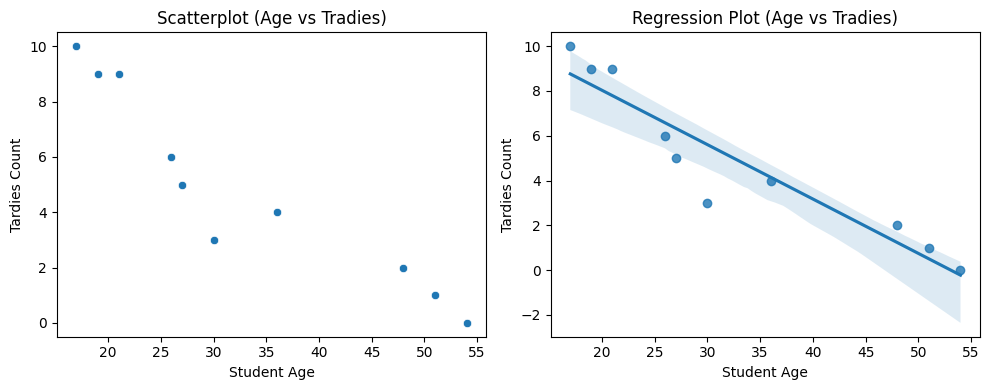

In [3]:
# Your code here

plt.figure(figsize=(10, 4))

#--> Scatter Plot
plt.subplot(1, 2, 1)
sns.scatterplot(
    data= student_df,
    x = 'age',
    y= 'tardies',
)
plt.xlabel('Student Age')
plt.ylabel('Tardies Count')
plt.title('Scatterplot (Age vs Tradies)')

#--> Regression Plot 
plt.subplot(1, 2, 2)
sns.regplot(
    data= student_df,
    x = 'age',
    y= 'tardies',
)
plt.xlabel('Student Age')
plt.ylabel('Tardies Count')
plt.title('Regression Plot (Age vs Tradies)')
plt.tight_layout()
plt.show()

Do you see a trend? Can you make any hypothesis about the relationship between age and number of tardies?

*your explanation here*

- From the scatterplot and regression plot, there is a clear negative relationship between student age and number of tardies.

- This indicates that as student age increases, the number of tardies tends to decrease.

- Younger students generally show higher tardy counts, while older students tend to be late less frequently.

- Therefore, based on the plots we can form hypothesis that younger students are more likely to be tardy than older students.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [ ]:
# your code here

# calculate covariance score
# This will tell us how 'age' and 'tradies' moves together
covariance_score = student_df['age'].cov(student_df['tardies'])

# calculate correlation
# This will tell us how strongly and in what direction are the two variables moves.
correlation_score = student_df['age'].corr(student_df['tardies'])

print("Covariance:", covariance_score)
print("Correlation:", correlation_score)


**Interpretations**
- Covariance is -45.57 (approx), which indicates a negative relationship between Age and Tardies. This means that as student age increases, the number of tardies tends to decrease. 
- However, covariance is **scale-dependent** and does not indicate the **strength** of the relationship clearly.

- Correlation is -0.94, which indicates a **very strong negative linear relationship** between **Age** and **Tardies**. Because correlation is standardized and ranges from -1 to +1, it is easier to interpret and compare across datasets.

**Comparison**: 
- Both covariance and correlation indicate a negative relationship, but correlation shows that the relationship is very strong in this case.

**Conclusion**:
- Younger students tend to have significantly more tardies, while older students tend to have fewer tardies.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [4]:
# your explanation here

# Import Train-Test Split
from sklearn.model_selection import train_test_split

# Set seed to define randomness
seed = 20

# Feature (independent variable) - keep as DataFrame
X = student_df[['age']]   # double brackets make it 2D

# Target (dependent variable)
y = student_df['tardies']

# Initialize model
lr = LinearRegression()

# Split data into training and testing sets
# 80% training data, 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Train the linear regression model
lr_model = lr.fit(X_train, y_train)

In [5]:
# Calculate coefficents 
print(f"Intercpetor: {lr.intercept_}")
print(f"Slope of the line: {lr.coef_}")

Intercpetor: 13.209938366718026
Slope of the line: [-0.25269646]


In [6]:
y_test_pred = lr.predict(X_test)
y_test_pred

array([6.63983051, 0.32241911])

In [7]:
y_test

7    6
1    1
Name: tardies, dtype: int64

Plot your regression model on your scatter plot.

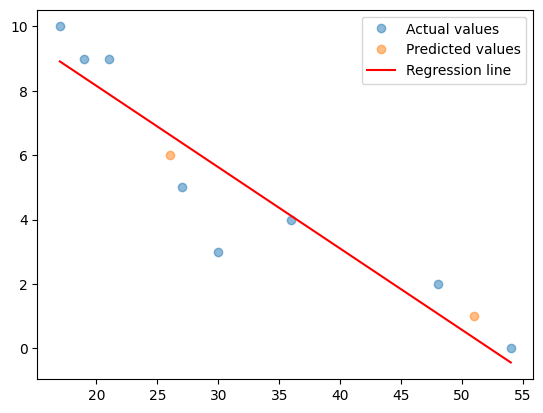

In [8]:
# Your code here.

# Define xmin xmax for the model of X(age):
xmin = int(X.min().iloc[0])
xmax = int(X.max().iloc[0])

# create evenly spaced values for refressuion line
x_model = np.arange(xmin, xmax+1)

# compute predicted y values using regression equation
# y = intercept + slope * x
y_model=lr.intercept_+lr.coef_ * x_model

# Plot training data points
plt.plot(X_train, y_train, "o", alpha=0.5, label="Actual values") 

# Plot test data points
plt.plot(X_test, y_test, "o", alpha=0.5, label="Predicted values")

# Plot regression line
plt.plot(x_model, y_model, 'r', label="Regression line")

# Add legend and show plot
plt.legend()
plt.show()

# The red line gives the predicted values of this model or best line of fit

### Evaluation of model

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

#### R² Score

In [ ]:
# lr.score() returns the R-squared (R²) value.
# R² tells us how much of the variation in the target variable (tardies)
# can be explained by the input variable (age).
# We calculate it for both training and testing data to check
# how well the model generalizes to unseen data.

print("R² Score:")
print(f"R² Train score: {lr.score(X_train, y_train):.4f}")
print(f"R² Test score: {lr.score(X_test, y_test):.4f}")

- R² (Train) score indicates that the model was able to learn and explain the pattern (variation) in the target variable (tardies) based on the independent variable age using the training data.

- R² (Test) score indicates that the model was also able to capture the same relationship on unseen (test) data, showing that the learned pattern generalizes well.

#### Mean Squared Error (MSE)

In [ ]:
# predict tardies for training and testing data using the trained model
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Mean Squared Error (MSE) measures the average squared difference
# between the actual values and the predicted values.
# A lower MSE means the model makes more accurate predictions.

mse_train = np.mean((y_train_pred - y_train) ** 2)
mse_test = np.mean((y_test_pred - y_test) ** 2)

print("MSE Score:")
print(f"MSE Train Set: {mse_train:.4f}")
print(f"MSE Test Set: {mse_test:.4f}")

#### Alternative Method: R² Score Score and Mean Absolute Error 


In [ ]:
# Another shoter version 
from sklearn.metrics import mean_squared_error, r2_score

# Make prediction
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Compute Score
print('Score:')
print(r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred))

# Compute MSE for training and testing sets 
print('MSE:')
print(mean_squared_error(y_train_pred, y_train), mean_squared_error(y_test_pred, y_test))

*your explanation here*

- In real-world scenarios, we primarily focus on the test set MSE, as it reflects how well the model performs on unseen data. A lower MSE indicates better predictive performance, meaning the model’s predictions are closer to the actual values.

- In this case, the test MSE is lower than the training MSE, which can occur when working with small datasets due to random data splitting.


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [ ]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("../vehicles.csv")

df = vehicles.copy()

df.head()

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [ ]:
# rename column names and filter columns for analysis
col_list_to_filter = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']

df =  df[col_list_to_filter].copy()

# characters to replace
char_to_replace = {
    " ": "_",
    "/": "_per_"
}

# create new column list
clean_cols = []

for col in df.columns:
    new_col = col.strip().lower()
    for old, new in char_to_replace.items():
        new_col = new_col.replace(old, new)
    clean_cols.append(new_col)

# rename all columns
df.columns = clean_cols

# remane target variable
df = df.rename(columns={'co2_emission_grams_per_mile': 'target'})

df.head()

In [ ]:
df['year'].nunique()

In [ ]:
# Your code here.

correlation_score_with_co2 = df.corr().round(2)
correlation_score_with_co2.sort_values(by='target')

- The correlation values indicate how strongly each independent variable is linearly related to CO₂ emissions.

- ``fuel_barrels_per_year`` shows the strongest positive correlation with CO₂ emissions, which is expected because higher fuel consumption directly leads to higher emissions.

- ``combined_mpg`` shows a strong negative correlation, confirming that more fuel-efficient vehicles emit less CO₂.

- ``fuel_cost_per_year`` is also strongly positively correlated, as fuel cost increases with fuel usage and emissions.

- ``cylinders`` exhibits a moderate positive correlation, since engines with more cylinders typically consume more fuel.

- ``year`` has the weakest correlation, suggesting that vehicle model year alone provides the least useful information for predicting CO₂ emissions.

**Note**

- The ``year`` variable shows a weak correlation with CO₂ emissions and contributes minimal additional information compared to fuel-related variables; therefore, it can be removed without significantly affecting model performance.


In [ ]:
df = df.drop(columns=['year'])

df.head()

In [ ]:
# Visualise distributions
features = list(df.columns)

plt.figure(figsize=(10, 6))

for i, col in enumerate(features, 1):
    if col != 'target':
        plt.subplot(2, 2, i)
        plt.scatter(df[col], df['target'], alpha=0.5)
        plt.xlabel(col)
        if i == 1:
            plt.ylabel('CO2 Emission Grams/Mile')

plt.tight_layout()
plt.show()

- Fuel Barrels per Year is the strongest predictor of CO₂ emissions.

- Combined MPG provides strong inverse information.

- Fuel Cost per Year also contains strong signals.

- Cylinders is informative but less precise due to variability.

- These visual findings are similar to correlation analysis.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [ ]:
# Your code here.

# Define independent variables and target  column
X = df.drop(columns='target')
y = df['target']

# Perform train-test split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=45)

# print(X_train.shape, X_test.shape)
# print(y_train.shape, y_test.shape)

# Initialise Model
lr = LinearRegression()

# Fitting Model
lr_vehicle_model = lr.fit(X_train, y_train)


- This model uses Multiple Linear Regression because it predicts a continuous target variable (CO2 emissions) using more than one independent variable.

- Multiple Linear Regression assumes a linear relationship between the predictors (fuel_barrels_per_year, combined_mpg, cylinders) and the target variable.

- The R2 scores indicate how much of the variation in CO2 emissions is explained by the model, while the MSE values measure the average prediction error.

- Similar performance on training and testing data suggests that the model generalizes well and is not overfitting.

In [ ]:
# Make predictions
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [ ]:
# inttersepter and slope
lr_vehicle_model.coef_, lr_vehicle_model.intercept_

In [ ]:
# Evaluate the model
train_r2 = lr.score(X_train, y_train)
test_r2 = lr.score(X_test, y_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Train R2:", train_r2)
print("Test R2:", test_r2)
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your code here.

# add intercept (required for statsmodels)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# print regression summary
print(model.summary())

#--> Model fit:
# - The R-squared value is very high, indicating that a large
#   proportion of the variation in CO2 emissions is explained
#   by the model.

#--> Overall model performance:
# - R-squared = 0.98 indicates that 98% of the variation in CO2
#   emissions is explained by the model.
# - Adjusted R-squared is also 0.98, confirming that the model
#   remains strong even after accounting for the number of
#   predictors.
# - The F-statistic is extremely large with a p-value of 0.00,
#   showing that the model is statistically significant overall.

# Most important variables:
# - fuel_barrels_per_year is the most important predictor.
#   It has the largest coefficient (≈ 19.63) and the highest
#   t-statistic, meaning fuel consumption has the strongest
#   impact on CO2 emissions.
#
# - combined_mpg is also highly important and has a negative
#   coefficient (≈ -3.17), indicating that higher fuel efficiency
#   leads to lower CO2 emissions.
#
# - fuel_cost_per_year has a positive and statistically
#   significant coefficient, but its effect is smaller compared
#   to fuel consumption.
#
# - cylinders has a positive but relatively small coefficient,
#   meaning engine size contributes to emissions, but less than
#   fuel usage and efficiency.

# Conclusions:
# - Fuel consumption is the dominant driver of CO2 emissions.
# - Fuel efficiency significantly reduces emissions.
# - Engine size and fuel cost contribute positively but to a
#   lesser extent.

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [71]:
# Your code here.

party_data = {
    'p_invited' : [1, 3, 4, 6, 8, 9, 11, 14],
    'attendies' : [1, 2, 4, 4, 5, 7, 8, 13] 
}

# Create DataFrame
df_party = pd.DataFrame(party_data)

# Display tops rows of the DataFrame
df_party.head()

,p_invited,attendies
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

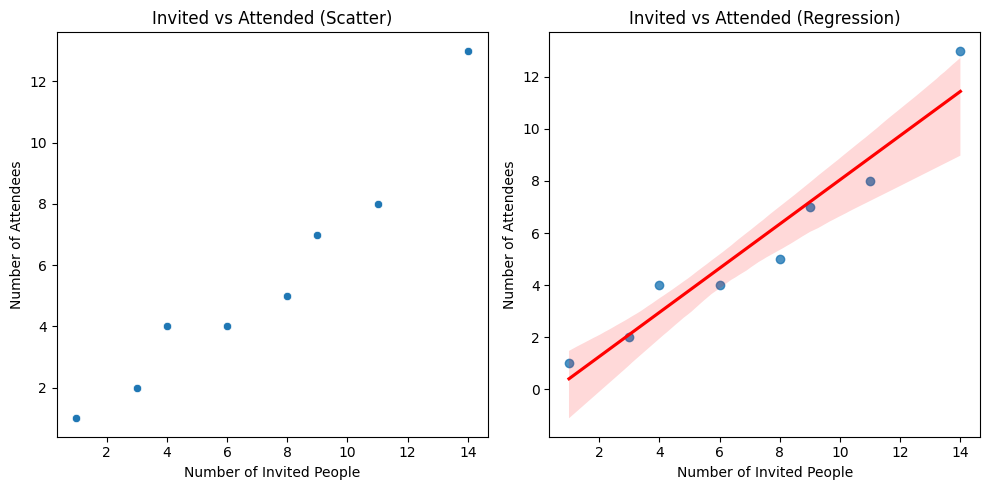

In [72]:
# Your code here.

plt.figure(figsize=(10,5))

# ---> Subplot 1: Scatter plot
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=df_party,
    x='p_invited',
    y='attendies'
)
plt.title("Invited vs Attended (Scatter)")
plt.xlabel("Number of Invited People")
plt.ylabel("Number of Attendees")

# ---> Subplot 2: Regression plot
plt.subplot(1, 2, 2)
sns.regplot(
    data=df_party,
    x='p_invited',
    y='attendies',
    line_kws={'color': 'red'}
)
plt.title("Invited vs Attended (Regression)")
plt.xlabel("Number of Invited People")
plt.ylabel("Number of Attendees")

plt.tight_layout()
plt.show()

- Attendance increases roughly linearly with the number of people invited. So which means we can use linear regression model to pridict the number of attendies. 

In [73]:
# Define feature and target
X = df_party[['p_invited']]
y = df_party['attendies']

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 20)

# Initialise & fit Model
lr_party = LinearRegression()
party_predict_model = lr_party.fit(X_train, y_train)

# Predictions
y_test_pred_party = party_predict_model.predict(X_test)

y_test_pred_party

array([6.29770992, 9.58015267])

In [74]:
df_party.head(10)

,p_invited,attendies
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


In [75]:
# Compare values
results_df = pd.DataFrame({
    "Invited": X_test['p_invited'].values,
    "Actual_Attendees": y_test.values,
    "Predicted_Attendees": y_test_pred_party
})

print(results_df)

   Invited  Actual_Attendees  Predicted_Attendees
0        9                 7             6.297710
1       14                13             9.580153


In [76]:
lr_party.intercept_, lr_party.coef_

(np.float64(0.3893129770992356), array([0.65648855]))

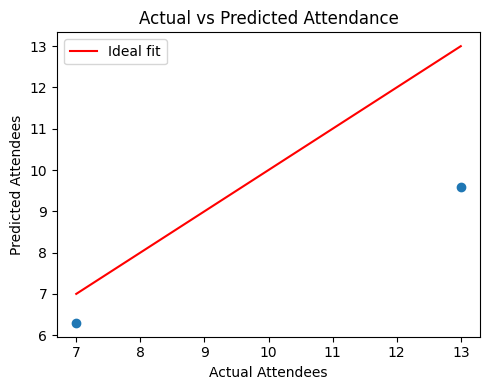

In [86]:
plt.figure(figsize=(5,4))

plt.scatter(y_test, y_test_pred_party)

plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r-',
    label="Ideal fit"
)

plt.xlabel("Actual Attendees")
plt.ylabel("Predicted Attendees")
plt.title("Actual vs Predicted Attendance")
plt.legend()
plt.tight_layout()
plt.show()


In [64]:
from sklearn.metrics import mean_squared_error, r2_score

r2 = r2_score(y_test, y_test_pred_party)
print("R² Score:", r2)
mse = mean_squared_error(y_test, y_test_pred_party)
print("MSE:", mse)



R² Score: -1.8819979293452098
MSE: 0.7204994823363025


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

*your explanation here*

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [ ]:
# Your response here.

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

*your explanation here*